# Comparando SVM com outros algoritmos (Regressão - Emissão CO2)

In [1]:
import trab03_utils as util

ds_dadosbrutos = util.getDSFuelConsumptionCo2()
ds_dadosbrutos.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [2]:
import autoML

automl = autoML.AutoML(ds_dadosbrutos, 'CO2EMISSIONS'
                             , min_x_y_correlation_rate=0.1
                             , n_features_threshold=0.75)

dfResults = automl.getResults()
dfResults.head(10)

,algorithm,features,n_features,train_time,mem_max,r2,neg_mean_absolute_error,neg_mean_squared_error
0,DecisionTreeRegressor,"(CYLINDERS, FUELCONSUMPTION_COMB_MPG)",2,3.267661,191.972656,0.898419,-0.020298,-0.002314
1,KNeighborsRegressor,"(CYLINDERS, FUELCONSUMPTION_COMB_MPG)",2,3.336030,192.574219,0.887630,-0.026508,-0.002759
2,LinearRegression,"(CYLINDERS, FUELCONSUMPTION_COMB_MPG)",2,3.209706,190.828125,0.857236,-0.040436,-0.003508
3,SVR,"(CYLINDERS, FUELCONSUMPTION_COMB_MPG)",2,3.335621,191.628906,0.735285,-0.064090,-0.006784


In [3]:
dfGroupBy_algorithm = dfResults.groupby('algorithm').mean().sort_values('r2', ascending=False)
dfGroupBy_algorithm

,train_time,mem_max,r2,neg_mean_absolute_error,neg_mean_squared_error
algorithm,,,,,
DecisionTreeRegressor,3.267661,191.972656,0.898419,-0.020298,-0.002314
KNeighborsRegressor,3.336030,192.574219,0.887630,-0.026508,-0.002759
LinearRegression,3.209706,190.828125,0.857236,-0.040436,-0.003508
SVR,3.335621,191.628906,0.735285,-0.064090,-0.006784


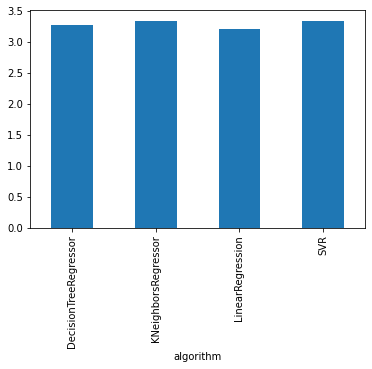

In [4]:
dfGroupBy_algorithm['train_time'].plot.bar();

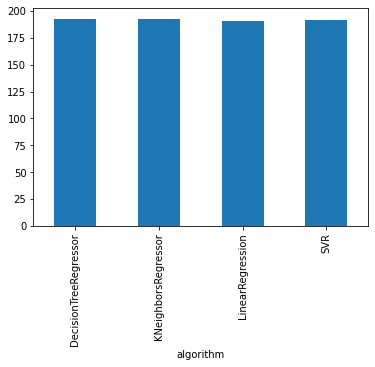

In [5]:
dfGroupBy_algorithm['mem_max'].plot.bar();

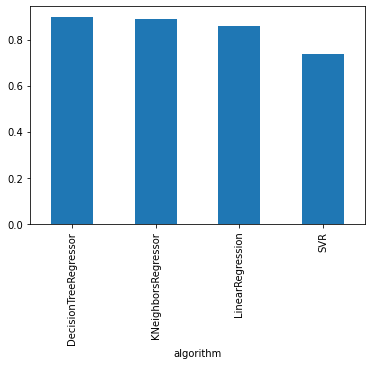

In [6]:
dfGroupBy_algorithm['r2'].plot.bar();

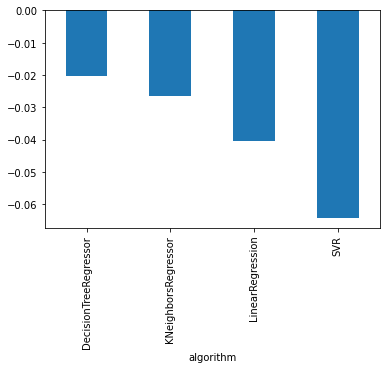

In [7]:
dfGroupBy_algorithm['neg_mean_absolute_error'].plot.bar();

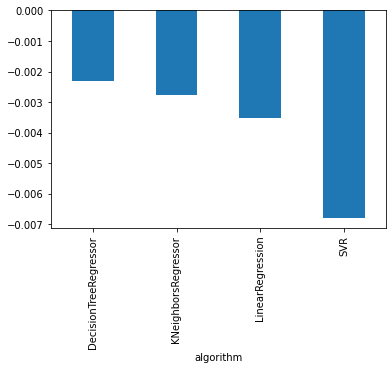

In [8]:
dfGroupBy_algorithm['neg_mean_squared_error'].plot.bar();